# Ανίχνευση της Θερμογένεσης του Φαιού Λιπώδους Ιστού 
## Στην περιοχή γύρω από τον αυχένα

- Λεξικό
    - Θερμική Εικόνα: Εικόνα που έχει παραχθεί από τις θερμοκρασίες 
    - Υπεριώδης Εικόνα: Δοθείσα εικόνα από τη θερμική κάμερα

## Εικόνες για τη γενική ανατομία του λιπώδους ιστού
### Εξέλιξη της φαιoποίησης του λευκού λιπώδους ιστού σε διαφορετικά ποντίκια υπό κρύο περιβάλλον
Στην εικόνα οι υποδόριες και σπλαχνικές αποθήκες τεμαχίστηκαν και τοποθετήθηκαν σε ένα πρότυπο ποντικιού ώστε να φανεί η σχετική τοποθεσία τους στο σώμα. 
Το ποντίκι στα αριστερά διατηρήθηκε σε θερμοκρασίες κοντά στη θερμο-ουδετερότητα (28℃ για 10 ημέρες), ενώ το ποντίκι στα δεξιά προσαρμόστηκε σε κρύο περιβάλλον (6℃ για 10 ημέρες). Η φαιοποίηση του λιπώδους οργάνου είναι εμφανής στον θερμικά προσαρμοσμένο ποντίκι. 
* Το λιπώδες όργανο αποτελείται από δυο υποδόριες αποθήκες: 
    - (Α) πρόσθια (βαθιά αυχενική, επιφανειακή αυχενική, ενδοκεφαλική, υποκεφαλική, αξιλο-θωρακική) 
    - (F) οπίσθια (ραχιαίος-οσφυϊκός, βουβωνικός, γλουτιαίος), 
    - και από αρκετές σπλαχνικές αποθήκες: 
        - (Β) μεσοθωρακικό, 
        - (C) μεσεντερικό, 
        - (D) ρετρό-περιτοναϊκό και
        - (Ε) κοιλιακό-πυελικό (περινεναλικός, περιατοβαρικός, παραμετρικός, περικοκικός).

Ράβδος κλίμακας: 1 cm. Το λιπώδες όργανο των ποντικών Sv129 περιέχει τον επιπολασμό των καφέ λιποκυττάρων και δείχνει την πλαστικότητα μετά από κρύα έκθεση. 
![ανατομική εικόνα](img/giorgano.png)

## Περιοχές Eνδιαφέροντος // Region of Interest (ROI)
### Διερεύνηση του BAT με ROI την επιφανειακή αυχενική περιοχή

| WAT Location            | BAT Location |
| ------------------------- | ------------------------- |
| ![something](img/wat_location.jpg)  | ![something](img/bat_location.jpg) |

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from celluloid import Camera
from IPython.display import HTML # to show the animation in Jupyter
from tqdm import tqdm
from glob import glob

from skimage.exposure import histogram
from skimage.util import img_as_ubyte

from src.features import mouse_detection
from src.data import data_utils
# displaying pandas 
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

- Παράδειγμα:
    - χρήση όλων των θερμικών εικόνων στο directory `/data/raw/0h/mouse_1`
    - χρήση των csv των εικόνων 
    - εξαγωγή των μασκών των αντικειμένων, και τα bounding box 
    - ορθογώνιο patch με βάση το bounding box

### Παραγωγή Εικόνας από αρχείο θερμοκρασιών csv

In [14]:
infrared_images = [] # stores (238, 98) arrays etc
exif_datum = []
items = glob(module_path + '/data/raw/0h/mouse_1/IR_*')
for item in items:
    infrared_image, exif_data = data_utils.IR_fixer(fpath=item)
    infrared_images.append(infrared_image)
    exif_datum.append(exif_data)
markerBack, markerBody = 70, 150

object_images, object_masks, initial_masks, mouse_locations = mouse_detection.mouse_detection(infrared_images, markerBack, markerBody)

csv_files = [] # stores (240, 160) arrays
items = glob(module_path + '/data/raw/0h/mouse_1/CSV_*')
for item in items:
    csv_files.append(data_utils.CSV_fixer(fpath=item))
# Χρήση Μορφολογικής Μάσκας για τις τιμές των θερμικών εικόνων
init_thermals = [initial_mask * csv_file  for (initial_mask, csv_file) in zip(initial_masks, csv_files)]
# Αποκοπή εικόνας στο Bounding Box
thermal_images = [init_thermal[mouse_location] for (init_thermal, mouse_location) in zip(init_thermals, mouse_locations)]

<AxesSubplot:title={'center':'2. Infrared Image'}>

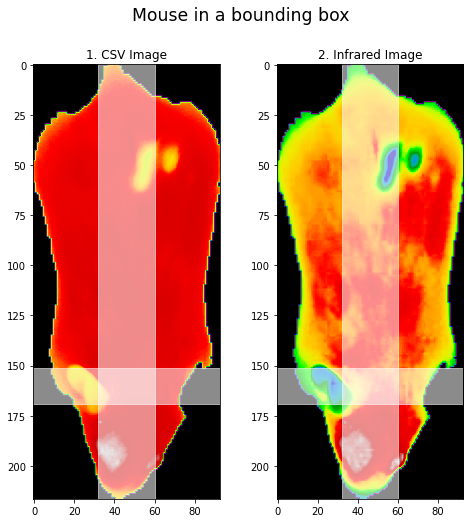

In [12]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Mouse in a bounding box', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])
ax1 = fig.add_subplot(grid[1])

#from skimage.exposure import rescale_intensity
#rescaled_example = rescale_intensity(image=example[0], in_range='image', out_range='dtype')
ax0.imshow(X=thermal_images[0], cmap=plt.cm.nipy_spectral)
xmin = int(0.35*thermal_images[0].shape[1])
xmax = int(0.65*thermal_images[0].shape[1])
ymin = int(0.70*thermal_images[0].shape[0])
ymax = int(0.78*thermal_images[0].shape[0])
ax0.axvspan(xmin=xmin, xmax=xmax, color='white', alpha=0.55)
ax0.axhspan(ymin=ymin, ymax=ymax, color='white', alpha=0.55)
ax0.set_title(label='1. CSV Image')
fig.add_subplot(ax0)

ax1.imshow(X=object_images[0], cmap=plt.cm.nipy_spectral)
xmin = int(0.35*object_images[0].shape[1])
xmax = int(0.65*object_images[0].shape[1])
ymin = int(0.70*object_images[0].shape[0])
ymax = int(0.78*object_images[0].shape[0])
ax1.axvspan(xmin=xmin, xmax=xmax, color='white', alpha=0.55)
ax1.axhspan(ymin=ymin, ymax=ymax, color='white', alpha=0.55)
ax1.set_title(label='2. Infrared Image')
fig.add_subplot(ax1)

### Παραγωγή Θερμικών Εικόνων του `/data/raw/0h/mouse_1`

36it [00:00, 49.12it/s] 


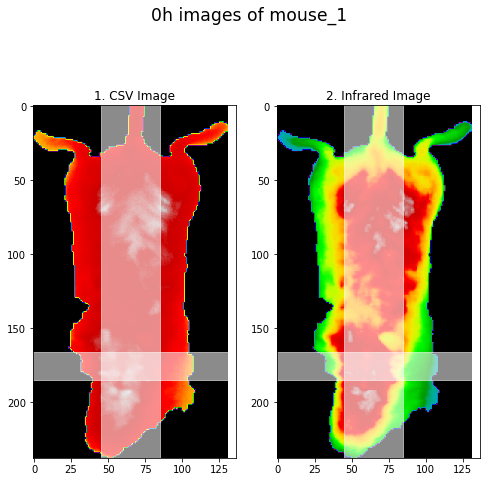

In [13]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='0h images of mouse_1', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])
ax1 = fig.add_subplot(grid[1])
ax0.set_title(label='1. Infrared Image')
ax1.set_title(label='2. Tissue Location')
camera = Camera(fig)
for thermal_image, object_image in tqdm(zip(thermal_images, object_images)):
    ax0.imshow(X=thermal_image, cmap=plt.cm.nipy_spectral)
    xmin = int(0.35*thermal_image.shape[1])
    xmax = int(0.65*thermal_image.shape[1])
    ymin = int(0.70*thermal_image.shape[0])
    ymax = int(0.78*thermal_image.shape[0])
    ax0.axvspan(xmin=xmin, xmax=xmax, color='white', alpha=0.55)
    ax0.axhspan(ymin=ymin, ymax=ymax, color='white', alpha=0.55)
    ax0.set_title(label='1. CSV Image')
    fig.add_subplot(ax0)

    ax1.imshow(X=object_image, cmap=plt.cm.nipy_spectral)
    xmin = int(0.35*object_image.shape[1])
    xmax = int(0.65*object_image.shape[1])
    ymin = int(0.70*object_image.shape[0])
    ymax = int(0.78*object_image.shape[0])
    ax1.axvspan(xmin=xmin, xmax=xmax, color='white', alpha=0.55)
    ax1.axhspan(ymin=ymin, ymax=ymax, color='white', alpha=0.55)
    ax1.set_title(label='2. Infrared Image')
    fig.add_subplot(ax1)
    camera.snap()
animation = camera.animate(interval=500)
# το HTML πρέπει να τρέχει στο jupyter notebook 
HTML(animation.to_html5_video()) # displaying the animation

# Ανιχνεύεται η συμπεριφορά του φαιού λιπώδους ιστού;
## Η καταγραφή για εννέα ορθογώνια δείγματα στα πέντε ποντίκια του πειράματος
### Επιλογή εικόνων για τη μέτρηση της μέσης θερμοκρασίας και της τυπικής απόκλισης
Στο αρχείο bat_list.yml έχουμε ορίσει από ποιες εικόνες θα καταγράψουμε τη μέση θερμοκρασία ενός τετραγωνικού patch το οποίο βρίσκεται στον αυχένα ενός ποντικιού, όπως φαίνεται στην παραπάνω εικόνα. 

Δομή του αρχείου yaml: 
```
samples: [0h, 24h, 48h, 72h, 96h, 120h, 144h, 192h, 240h]
mouse_1:
  csv: [CSV_2060.csv, CSV_2305.csv, CSV_2509.csv, CSV_2730.csv, CSV_2957.csv, CSV_3181.csv, CSV_3397.csv, CSV_3652.csv, CSV_3855.csv]
  jpeg: [IR_2060.jpg, IR_2305.jpg, IR_2509.jpg, IR_2730.jpg, IR_2957.jpg, IR_3181.jpg, IR_3397.jpg, IR_3652.jpg, IR_3855.jpg]
.
.
. κλπ
```

In [5]:
# Εισαγωγή του αρχείου yaml
import yaml
from src.features import img_to_vectors
with open(module_path + '/data/bat_list.yml') as file:
    experiment = yaml.load(file, Loader=yaml.FullLoader)
# experiment['samples'], experiment['mouse_id']

10it [00:00, 75.19it/s]

['mouse_1', 'mouse_2', 'mouse_3', 'mouse_4', 'mouse_5']
Body : shape: (220, 97), area: 14778 Mean Temp: 31.42715049397754  Std Temp: 1.5282070112359722
Patch : shape: (17, 30), area: 510 Mean Temp: 31.553754901960787  Std Temp: 1.396424904689384
Body : shape: (230, 99), area: 16829 Mean Temp: 31.572011943668674  Std Temp: 1.543993447420763
Patch : shape: (18, 30), area: 540 Mean Temp: 33.03151851851852  Std Temp: 0.33962650731631555
Body : shape: (218, 95), area: 15808 Mean Temp: 31.743745445344132  Std Temp: 1.152805454574915
Patch : shape: (18, 28), area: 504 Mean Temp: 32.365249999999996  Std Temp: 0.9742357123480362
Body : shape: (236, 105), area: 17859 Mean Temp: 31.12934878772608  Std Temp: 1.3080643963070482
Patch : shape: (19, 32), area: 608 Mean Temp: 32.37919407894737  Std Temp: 0.43037841958431006
Body : shape: (235, 90), area: 15582 Mean Temp: 31.262739057887305  Std Temp: 1.3936206717136046
Patch : shape: (19, 27), area: 513 Mean Temp: 32.61505653021442  Std Temp: 0.551968

37it [00:00, 113.00it/s]

Body : shape: (238, 100), area: 17080 Mean Temp: 31.558087236533957  Std Temp: 1.3918166890865205
Patch : shape: (19, 30), area: 570 Mean Temp: 32.1029947368421  Std Temp: 0.3759718424138816
Body : shape: (236, 97), area: 16335 Mean Temp: 31.402970431588614  Std Temp: 1.4659029785839413
Patch : shape: (19, 30), area: 570 Mean Temp: 32.72187894736842  Std Temp: 0.44958876072174336
Body : shape: (238, 104), area: 16982 Mean Temp: 31.408389117889527  Std Temp: 1.329354049066663
Patch : shape: (19, 31), area: 589 Mean Temp: 31.734728353140913  Std Temp: 0.9817984178734013
Body : shape: (233, 101), area: 16880 Mean Temp: 31.375944727488154  Std Temp: 1.3422720961785455
Patch : shape: (18, 30), area: 540 Mean Temp: 30.939698148148146  Std Temp: 1.7282888753513508
Body : shape: (231, 95), area: 16150 Mean Temp: 31.444520557275542  Std Temp: 1.3151887579431794
Patch : shape: (19, 28), area: 532 Mean Temp: 31.757845864661654  Std Temp: 0.5475759283377319
Body : shape: (238, 101), area: 17324 Me

45it [00:00, 99.66it/s] 


Body : shape: (236, 95), area: 15832 Mean Temp: 32.13978303436079  Std Temp: 1.3844437713194107
Patch : shape: (19, 28), area: 532 Mean Temp: 32.81373872180451  Std Temp: 0.4776710469581819
Body : shape: (238, 101), area: 17390 Mean Temp: 31.691336170212768  Std Temp: 1.5995849740760135
Patch : shape: (19, 30), area: 570 Mean Temp: 32.58754912280702  Std Temp: 0.7185491609554332
Body : shape: (219, 88), area: 14444 Mean Temp: 32.1898027554694  Std Temp: 1.4708609479515622
Patch : shape: (17, 27), area: 459 Mean Temp: 33.4102265795207  Std Temp: 0.4375327150811649
Body : shape: (236, 105), area: 17351 Mean Temp: 31.010437554031473  Std Temp: 1.2496487670702814
Patch : shape: (19, 32), area: 608 Mean Temp: 31.41520065789474  Std Temp: 0.3800115941785112
Body : shape: (236, 89), area: 13400 Mean Temp: 31.697614477611943  Std Temp: 0.9857280583933032
Patch : shape: (19, 26), area: 494 Mean Temp: 31.75944129554656  Std Temp: 4.585984435925813


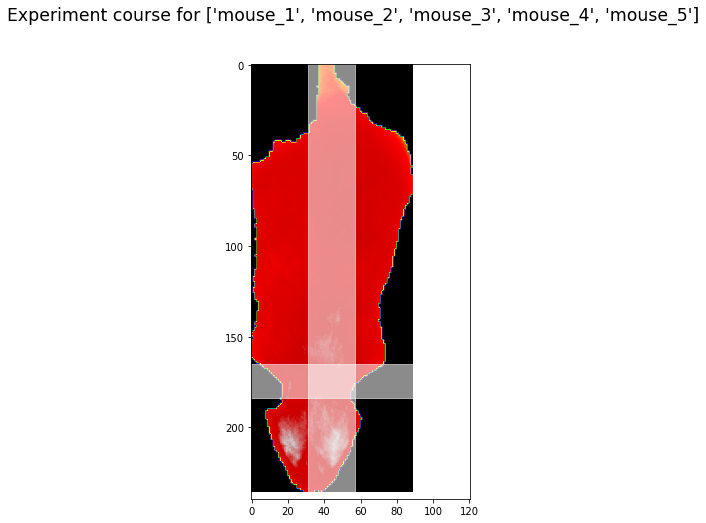

In [6]:
# Πρόσβαση στα δεδομένα του αρχείου
mouse_names = experiment['mouse_id']
# mouse_names = ['mouse_1']
# Κατασκευή των global path για τα αρχεία του πειράματος
infrared_items = []
csv_items = []
for mouse_name in mouse_names:
    for hour, jpeg_file in zip(experiment['samples'], experiment[mouse_name]['jpeg']):
        full_jpeg_path = module_path + '/data/raw/' + hour + '/' + mouse_name + '/' + jpeg_file
        infrared_items.append(full_jpeg_path)

    for hour, csv_file in zip(experiment['samples'], experiment[mouse_name]['csv']):
        full_csv_path = module_path + '/data/raw/' + hour + '/' + mouse_name + '/' + csv_file
        csv_items.append(full_csv_path)
# Εισαγωγή των δεδομένων με βάση τα path και οι προεπεξεργασίες τους
infrared_images = [] # will store (238, 98), (229, 100) arrays etc
exif_datum = []
for item in infrared_items:
    infrared_image, exif_data = data_utils.IR_fixer(fpath=item)
    infrared_images.append(infrared_image)
    exif_datum.append(exif_data)

markerBack, markerBody = 70, 120

object_images, object_masks, initial_masks, mouse_locations = mouse_detection.mouse_detection(infrared_images, markerBack, markerBody)

csv_files = [] # will store (240, 160) arrays
for item in csv_items:
    csv_files.append(data_utils.CSV_fixer(item))
thermals = [mask * csv for (mask, csv) in zip(initial_masks, csv_files)]
new = [thermal[mouse_location] for (thermal, mouse_location) in zip(thermals, mouse_locations)]

fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t=f'Experiment course for {mouse_names}', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])

mean_roi_temp = []
roi_area_area = []
std_roi = []

mean_temp = []
std_temp = []
scores = []

camera = Camera(fig)
print(f'{mouse_names}')
for i, (image) in tqdm(enumerate(new)):
    ordinatesX, ordinatesY = img_to_vectors.img_to_vectors(image)
    intensityFeature = image[ordinatesX, ordinatesY]
    mean_temp.append(intensityFeature.mean())
    std_temp.append(intensityFeature.std())
    xmin = int(0.35*image.shape[1])
    xmax = int(0.65*image.shape[1])
    ymin = int(0.70*image.shape[0])
    ymax = int(0.78*image.shape[0])
    roi_area = image[ymin:ymax, xmin:xmax]
    
    score = (np.std(roi_area), np.mean(roi_area), roi_area.size)
    scores.append(score)
    
    std_roi.append(np.std(roi_area))
    mean_roi_temp.append(np.mean(roi_area))
    roi_area_area.append(roi_area.size)
    # print(f'sample: #{i}')
    print(f'Body : shape: {image.shape}, area: {intensityFeature.size} Mean Temp: {np.mean(intensityFeature)}  Std Temp: {np.std(intensityFeature)}')
    print(f'Patch : shape: {roi_area.shape}, area: {roi_area.size} Mean Temp: {np.mean(roi_area)}  Std Temp: {np.std(roi_area)}')
    ax0.imshow(X=image, cmap=plt.cm.nipy_spectral)
    # ax0.set_title(label=sample)
    ax0.axvspan(xmin=xmin, xmax=xmax, color='white', alpha=0.55)
    ax0.axhspan(ymin=ymin, ymax=ymax, color='white', alpha=0.55)    
    fig.add_subplot(ax0)
    camera.snap()
animation = camera.animate(interval=1000)
# το HTML πρέπει να τρέχει στο jupyter notebook 
HTML(animation.to_html5_video()) # displaying the animation

In [7]:
roi_temp = pd.DataFrame(np.reshape(mean_roi_temp, (9, 5)), columns=experiment['mouse_id'], index=experiment['samples'])
roi_area = pd.DataFrame(np.reshape(roi_area_area, (9, 5)), columns=experiment['mouse_id'], index=experiment['samples'])
roi_std = pd.DataFrame(np.reshape(std_roi, (9, 5)), columns=experiment['mouse_id'], index=experiment['samples'])

body_temp = pd.DataFrame(np.reshape(mean_temp, (9, 5)), columns=experiment['mouse_id'], index=experiment['samples'])
body_std = pd.DataFrame(np.reshape(std_temp, (9, 5)), columns=experiment['mouse_id'], index=experiment['samples'])
samples_sec = pd.DataFrame(np.reshape(np.arange(45), (9, 5), order='F'), columns=experiment['mouse_id'], index=experiment['samples'])

In [8]:
diff = roi_temp - body_temp

### Ποιες περιπτώσεις εμφανίζουν μεγάλο σφάλμα;

In [9]:
display('body_temp', 'roi_temp', 'diff')

,mouse_1,mouse_2,mouse_3,mouse_4,mouse_5
0h,31.427150,31.572012,31.743745,31.129349,31.262739
24h,30.981710,31.189303,30.881312,30.354533,31.617942
48h,31.467859,31.691703,32.102851,31.403515,31.883768
72h,32.262426,31.392445,31.558087,31.402970,31.408389
96h,31.375945,31.444521,30.410619,31.282732,31.703641
120h,31.388089,31.052684,29.714681,31.622931,30.552216
144h,32.053979,31.242134,31.498736,31.429250,31.202621
192h,31.222708,33.579014,31.861586,31.922226,31.828034
240h,32.139783,31.691336,32.189803,31.010438,31.697614
,mouse_1,mouse_2,mouse_3,mouse_4,mouse_5


In [ ]:
roi_temp = pd.DataFrame()
roi_std = pd.DataFrame()
roi_area = pd.DataFrame()

In [ ]:
# mouse_1 datapoints
mean_roi_temp1 = pd.Series(mean_roi_temp, index=experiment['samples'])
roi_area_area1 = pd.Series(roi_area_area, index=experiment['samples'])
std_roi1 = pd.Series(std_roi, index=experiment['samples'])

In [ ]:
# mouse_2 datapoints
mean_roi_temp2 = pd.Series(mean_roi_temp, index=experiment['samples'])
roi_area_area2 = pd.Series(roi_area_area, index=experiment['samples'])
std_roi2 = pd.Series(std_roi, index=experiment['samples'])

In [ ]:
# mouse_3 datapoints
mean_roi_temp3 = pd.Series(mean_roi_temp, index=experiment['samples'])
roi_area_area3 = pd.Series(roi_area_area, index=experiment['samples'])
std_roi3 =  pd.Series(std_roi, index=experiment['samples'])

In [ ]:
# mouse_4 datapoints
mean_roi_temp4 = pd.Series(mean_roi_temp, index=experiment['samples'])
roi_area_area4 = pd.Series(roi_area_area, index=experiment['samples'])
std_roi4 =  pd.Series(std_roi, index=experiment['samples'])

In [ ]:
# mouse_5 datapoints
mean_roi_temp5 = pd.Series(mean_roi_temp, index=experiment['samples'])
roi_area_area5 = pd.Series(roi_area_area, index=experiment['samples'])
std_roi5 =  pd.Series(std_roi, index=experiment['samples'])

In [10]:
roi_temp['mouse_1'] = mean_roi_temp1
roi_temp['mouse_2'] = mean_roi_temp2
roi_temp['mouse_3'] = mean_roi_temp3
roi_temp['mouse_4'] = mean_roi_temp4
roi_temp['mouse_5'] = mean_roi_temp5

roi_std['mouse_1'] = std_roi1
roi_std['mouse_2'] = std_roi2
roi_std['mouse_3'] = std_roi3
roi_std['mouse_4'] = std_roi4
roi_std['mouse_5'] = std_roi5

roi_area['mouse_1'] = roi_area_area1
roi_area['mouse_2'] = roi_area_area2
roi_area['mouse_3'] = roi_area_area3
roi_area['mouse_4'] = roi_area_area4
roi_area['mouse_5'] = roi_area_area5

NameError: name 'mean_roi_temp1' is not defined

<AxesSubplot:xlabel='Sample Hours'>

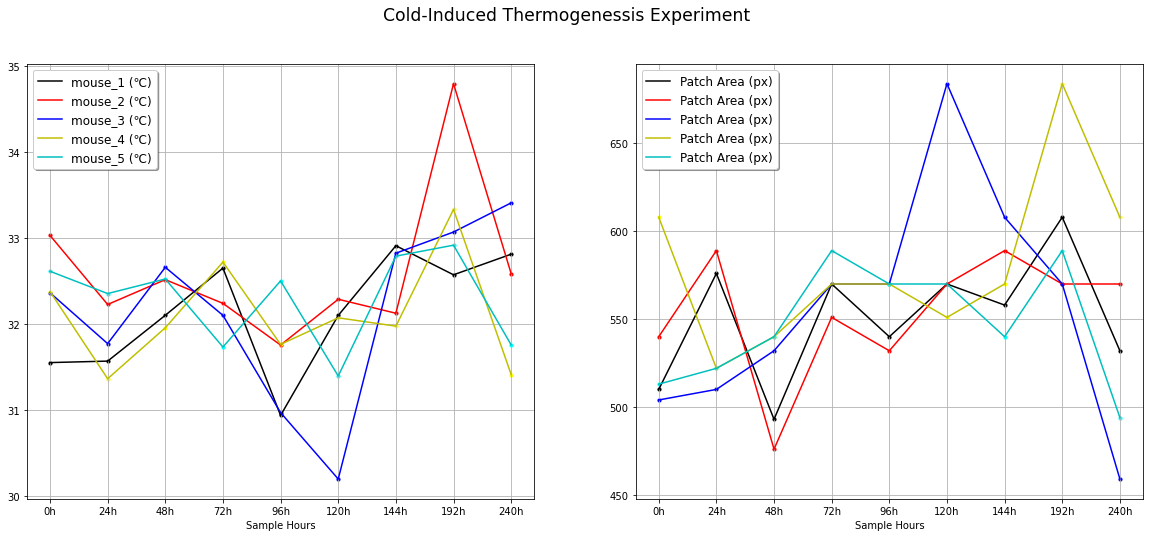

In [11]:
pos_x = np.arange(len(experiment['samples']))

fig = plt.figure(figsize=(20, 8), constrained_layout=False)
fig.suptitle(t='Cold-Induced Thermogenessis Experiment', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, hspace=0.25)
ax = fig.add_subplot(grid[0])
ax.grid(True)
ax.plot(pos_x, roi_temp['mouse_1'].values, 'k', label='mouse_1 (℃)')
ax.plot(pos_x, roi_temp['mouse_2'].values, 'r', label='mouse_2 (℃)')
ax.plot(pos_x, roi_temp['mouse_3'].values, 'b', label='mouse_3 (℃)')
ax.plot(pos_x, roi_temp['mouse_4'].values, 'y', label='mouse_4 (℃)')
ax.plot(pos_x, roi_temp['mouse_5'].values, 'c', label='mouse_5 (℃)')
ax.scatter(pos_x, roi_temp['mouse_1'].values, c='black', s=10)
ax.scatter(pos_x, roi_temp['mouse_2'].values, c='red', s=10)
ax.scatter(pos_x, roi_temp['mouse_3'].values, c='blue', s=10)
ax.scatter(pos_x, roi_temp['mouse_4'].values, c='yellow', s=10)
ax.scatter(pos_x, roi_temp['mouse_5'].values, c='cyan', s=10)

ax.set_xticks(ticks=pos_x)
ax.set_xticklabels(labels=experiment['samples'])
# ax.axhline(y=meanScores[3], color='r', linestyle='--', label='Mean '+"{:.2f}".format(meanScores[3]))
ax.legend(loc='best', shadow=True, fontsize='large')
ax.set_xlabel(xlabel='Sample Hours')
fig.add_subplot(ax)

ax = fig.add_subplot(grid[1])

ax.grid(True)
ax.plot(pos_x, roi_area['mouse_1'].values, 'k', label='Patch Area (px)')
ax.plot(pos_x, roi_area['mouse_2'].values, 'r', label='Patch Area (px)')
ax.plot(pos_x, roi_area['mouse_3'].values, 'b', label='Patch Area (px)')
ax.plot(pos_x, roi_area['mouse_4'].values, 'y', label='Patch Area (px)')
ax.plot(pos_x, roi_area['mouse_5'].values, 'c', label='Patch Area (px)')

ax.scatter(pos_x, roi_area['mouse_1'].values, c='black', s=10)
ax.scatter(pos_x, roi_area['mouse_2'].values, c='red', s=10)
ax.scatter(pos_x, roi_area['mouse_3'].values, c='blue', s=10)
ax.scatter(pos_x, roi_area['mouse_4'].values, c='yellow', s=10)
ax.scatter(pos_x, roi_area['mouse_5'].values, c='cyan', s=10)

ax.set_xticks(ticks=pos_x)
ax.set_xticklabels(labels=experiment['samples'])
#ax.axhline(y=meanScores[3], color='r', linestyle='--', label='Mean '+"{:.2f}".format(meanScores[3]))
ax.legend(loc='best', shadow=True, fontsize='large')
ax.set_xlabel(xlabel='Sample Hours')
fig.add_subplot(ax)

Με αποτύπωση bar plots τα οποία περιέχουν και την τυπική απόκλιση

Text(0.5, 0, 'Sample Hours')

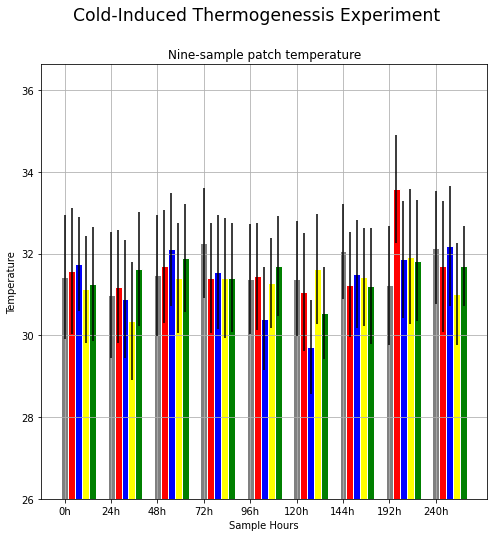

In [14]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Cold-Induced Thermogenessis Experiment', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax = fig.add_subplot(grid[0])
ax.grid(True)
# set width of bars
barWidth = 0.15

# Set position of bar on X axis
r1 = np.arange(len(experiment['samples']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
ax.bar(r1, body_temp['mouse_1'].values, yerr=body_std['mouse_1'].values, color='gray', width=barWidth, edgecolor='white', label='var1')
ax.bar(r2, body_temp['mouse_2'].values, yerr=body_std['mouse_2'].values, color='red', width=barWidth, edgecolor='white', label='var2')
ax.bar(r3, body_temp['mouse_3'].values, yerr=body_std['mouse_3'].values, color='blue', width=barWidth, edgecolor='white', label='var3')
ax.bar(r4, body_temp['mouse_4'].values, yerr=body_std['mouse_4'].values, color='yellow', width=barWidth, edgecolor='white', label='var4')
ax.bar(r5, body_temp['mouse_5'].values, yerr=body_std['mouse_5'].values, color='green', width=barWidth, edgecolor='white', label='var5')

# Add xticks on the middle of the group bars
ax.set_xlabel(xlabel='Sample Hours')
ax.set_ylim(bottom=26)
ax.set_ylabel('Temperature')
ax.set_title('Nine-sample patch temperature')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
ax.set_xticks(ticks=np.arange(0, 9, 1))
ax.set_xticklabels(labels=experiment['samples'])
ax.set_xlabel(xlabel='Sample Hours')
# Create legend & Show graphic
# plt.legend()
# plt.show()

Text(0.5, 0, 'Sample Hours')

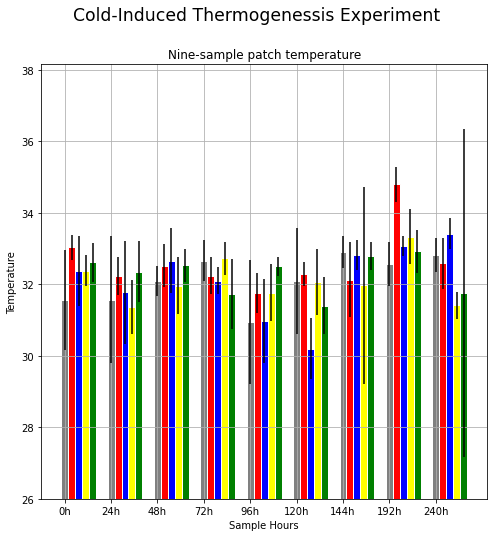

In [15]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Cold-Induced Thermogenessis Experiment', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax = fig.add_subplot(grid[0])
ax.grid(True)
# set width of bars
barWidth = 0.15

# Set position of bar on X axis
r1 = np.arange(len(experiment['samples']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
ax.bar(r1, roi_temp['mouse_1'].values, yerr=roi_std['mouse_1'].values, color='gray', width=barWidth, edgecolor='white', label='var1')
ax.bar(r2, roi_temp['mouse_2'].values, yerr=roi_std['mouse_2'].values, color='red', width=barWidth, edgecolor='white', label='var2')
ax.bar(r3, roi_temp['mouse_3'].values, yerr=roi_std['mouse_3'].values, color='blue', width=barWidth, edgecolor='white', label='var3')
ax.bar(r4, roi_temp['mouse_4'].values, yerr=roi_std['mouse_4'].values, color='yellow', width=barWidth, edgecolor='white', label='var4')
ax.bar(r5, roi_temp['mouse_5'].values, yerr=roi_std['mouse_5'].values, color='green', width=barWidth, edgecolor='white', label='var5')

# Add xticks on the middle of the group bars
ax.set_xlabel(xlabel='Sample Hours')
ax.set_ylim(bottom=26)
ax.set_ylabel('Temperature')
ax.set_title('Nine-sample patch temperature')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
ax.set_xticks(ticks=np.arange(0, 9, 1))
ax.set_xticklabels(labels=experiment['samples'])
ax.set_xlabel(xlabel='Sample Hours')
# Create legend & Show graphic
# plt.legend()
# plt.show()

Text(0.5, 0, 'Mouse #')

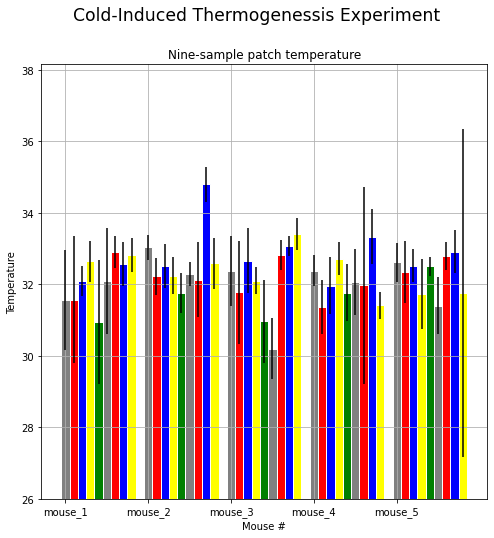

In [13]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Cold-Induced Thermogenessis Experiment', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax = fig.add_subplot(grid[0])
ax.grid(True)
# set width of bars
barWidth = 0.1

temp_transp = roi_temp.T
std_transp = roi_std.T

# Set position of bar on X axis
r1 = np.arange(len(experiment['mouse_id']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
ax.bar(r1, temp_transp['0h'].values, yerr=std_transp['0h'].values, color='gray', width=barWidth, edgecolor='white', label='var1')
ax.bar(r2, temp_transp['24h'].values, yerr=std_transp['24h'].values, color='red', width=barWidth, edgecolor='white', label='var2')
ax.bar(r3, temp_transp['48h'].values, yerr=std_transp['48h'].values, color='blue', width=barWidth, edgecolor='white', label='var3')
ax.bar(r4, temp_transp['72h'].values, yerr=std_transp['72h'].values, color='yellow', width=barWidth, edgecolor='white', label='var4')
ax.bar(r5, temp_transp['96h'].values, yerr=std_transp['96h'].values, color='green', width=barWidth, edgecolor='white', label='var5')
ax.bar(r6, temp_transp['120h'].values, yerr=std_transp['120h'].values, color='gray', width=barWidth, edgecolor='white', label='var1')
ax.bar(r7, temp_transp['144h'].values, yerr=std_transp['144h'].values, color='red', width=barWidth, edgecolor='white', label='var2')
ax.bar(r8, temp_transp['192h'].values, yerr=std_transp['192h'].values, color='blue', width=barWidth, edgecolor='white', label='var3')
ax.bar(r9, temp_transp['240h'].values, yerr=std_transp['240h'].values, color='yellow', width=barWidth, edgecolor='white', label='var4')
 
# Add xticks on the middle of the group bars
ax.set_xlabel(xlabel='Sample Hours')
ax.set_ylim(bottom=26)
ax.set_ylabel('Temperature')
ax.set_title('Nine-sample patch temperature')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
ax.set_xticks(ticks=np.arange(0, 5, 1))
ax.set_xticklabels(labels=experiment['mouse_id'])
ax.set_xlabel(xlabel='Mouse #')

Text(0.5, 0, 'Mouse #')

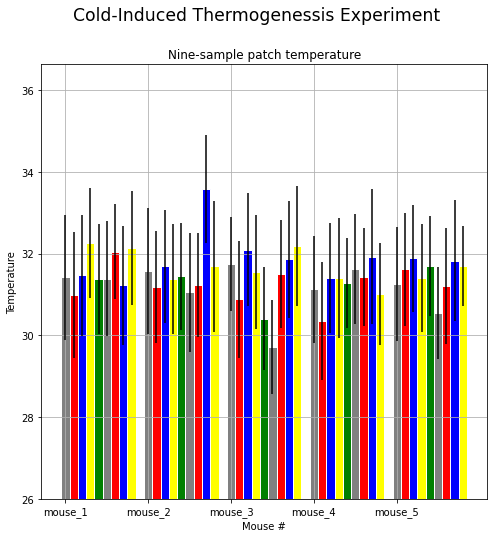

In [16]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Cold-Induced Thermogenessis Experiment', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax = fig.add_subplot(grid[0])
ax.grid(True)
# set width of bars
barWidth = 0.1

temp_transp = body_temp.T
std_transp = body_std.T

# Set position of bar on X axis
r1 = np.arange(len(experiment['mouse_id']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
ax.bar(r1, temp_transp['0h'].values, yerr=std_transp['0h'].values, color='gray', width=barWidth, edgecolor='white', label='var1')
ax.bar(r2, temp_transp['24h'].values, yerr=std_transp['24h'].values, color='red', width=barWidth, edgecolor='white', label='var2')
ax.bar(r3, temp_transp['48h'].values, yerr=std_transp['48h'].values, color='blue', width=barWidth, edgecolor='white', label='var3')
ax.bar(r4, temp_transp['72h'].values, yerr=std_transp['72h'].values, color='yellow', width=barWidth, edgecolor='white', label='var4')
ax.bar(r5, temp_transp['96h'].values, yerr=std_transp['96h'].values, color='green', width=barWidth, edgecolor='white', label='var5')
ax.bar(r6, temp_transp['120h'].values, yerr=std_transp['120h'].values, color='gray', width=barWidth, edgecolor='white', label='var1')
ax.bar(r7, temp_transp['144h'].values, yerr=std_transp['144h'].values, color='red', width=barWidth, edgecolor='white', label='var2')
ax.bar(r8, temp_transp['192h'].values, yerr=std_transp['192h'].values, color='blue', width=barWidth, edgecolor='white', label='var3')
ax.bar(r9, temp_transp['240h'].values, yerr=std_transp['240h'].values, color='yellow', width=barWidth, edgecolor='white', label='var4')
 
# Add xticks on the middle of the group bars
ax.set_xlabel(xlabel='Sample Hours')
ax.set_ylim(bottom=26)
ax.set_ylabel('Temperature')
ax.set_title('Nine-sample patch temperature')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
ax.set_xticks(ticks=np.arange(0, 5, 1))
ax.set_xticklabels(labels=experiment['mouse_id'])
ax.set_xlabel(xlabel='Mouse #')